# Basics

[Left off at](https://www.tutorialspoint.com/seaborn/seaborn_plotting_categorical_data.htm)


[Cheat Sheet from DataCamp.com](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

[Maint](https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.htm)

In [0]:
# industry standard is to import as "sb" or "sns"
import seaborn as sb

Seaborn is a modification to the matplotlib library that can make your data visualization clearer and more dynamic.

[Seaborn Docs](https://seaborn.pydata.org/index.html)

In [0]:
# dependencies needed

# to actually graph and display the graph
import matplotlib.pyplot as plt

# for numerical operations and loading data
import numpy as np
import pandas as pd

### Matplotlib Vanilla vs Seaborn 

#### Matplotlib

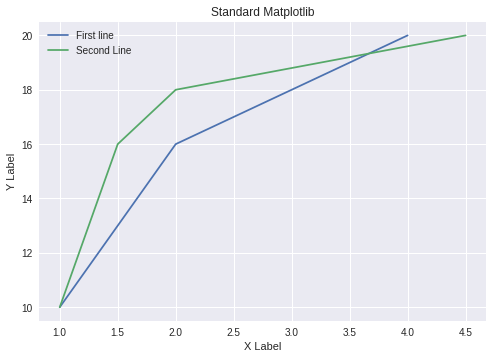

In [3]:

def basic_line_graph(title=""):
  
  # Pseudo basic line data
  x1 = [1, 2, 3, 4]
  y1 = [10, 15, 9, 25]

  x2 = [1.0, 1.5, 2.0, 4.5]
  y2 = [10, 16, 18, 20]

# plotting the lines
  plt.plot(x1, y2, label="First line")
  plt.plot(x2, y2, label="Second Line")

  # Descriptors for the graph
  plt.xlabel('X Label')
  plt.ylabel('Y Label')
  plt.title(title)

  # intialize the legend
  plt.legend()

basic_line_graph(title="Standard Matplotlib")
plt.show()


Note, unless you're putting the seaborn style in a with statement, you'll need to reset the seaborn style with seaborn.set() in the next graph

### Seaborn default/reset

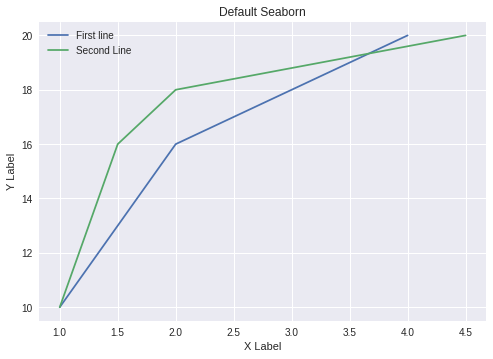

In [4]:
# Using the same line graph function that plots the lines and descibes the graph

# Using seaborn.set() activates the seaborn defaults (also resets them)
# add seaborn before the line is graphed
sb.set()
basic_line_graph("Default Seaborn")
plt.show()

### Themes/Styles


*   Darkgrid
*   Whitegrid
*   Dark  - has no grid lines
*   White  - has no grid lines
*   Ticks - similar to "white" but has raised tick marks


Syntax:
```
sb.set_style("whitegrid")
```





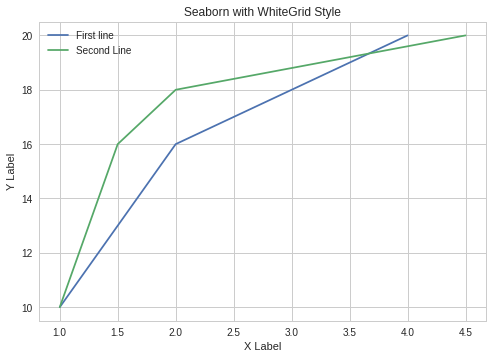

In [5]:
# There are 5 themes/styles that seaborn offers
# (somewhat similar to matplotlib styles)

sb.set_style("whitegrid")
basic_line_graph("Seaborn with WhiteGrid Style")
plt.show()

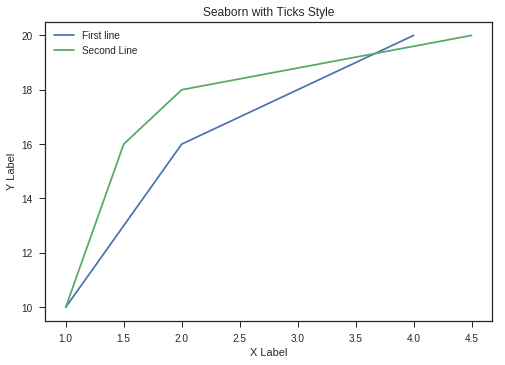

In [6]:
sb.set_style("ticks")
basic_line_graph("Seaborn with Ticks Style")
plt.show()

### Histogram and Kernal Density Estimation plots

distplot() is used to visualized the parametric distribution, this is done with both the histogram and the kernal desnsity estimation on, but it is customizable.


```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```

[Good explaination and visualization of KDE](https://mathisonian.github.io/kde/)


In [0]:
# grabbing some sample data from the seaborn library
attention_df = sb.load_dataset('attention')


In [8]:
# Viewing the data
attention_df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [9]:
attention_df.tail()

,Unnamed: 0,subject,attention,solutions,score
55,55,16,focused,3,7.0
56,56,17,focused,3,6.0
57,57,18,focused,3,6.0
58,58,19,focused,3,6.0
59,59,20,focused,3,5.0


*We'll be using a function and just replacing the kde, hist, and title in the function for visual ease, but note where it's changing in the function*

In [0]:
def histogram_and_kde_attention_plt(kde, hist, title=""):
  sb.set()
  sb.distplot(attention_df['score'], kde=kde, hist=hist)
  plt.xlabel('Score')
  plt.ylabel('Number of Students')
  plt.title(title)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


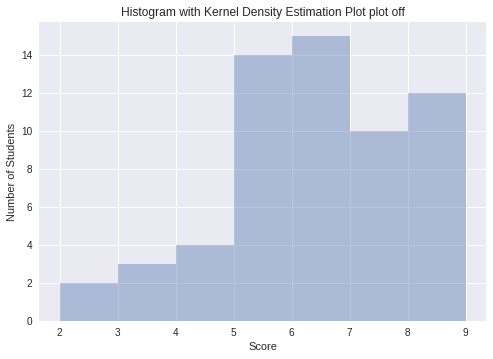

In [11]:
histogram_and_kde_attention_plt(kde=False, hist=True,title="Histogram with Kernel Density Estimation Plot plot off")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


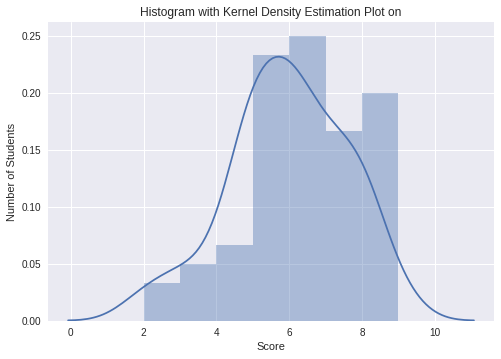

In [12]:
histogram_and_kde_attention_plt(kde=True, hist=True, title="Histogram with Kernel Density Estimation Plot on")


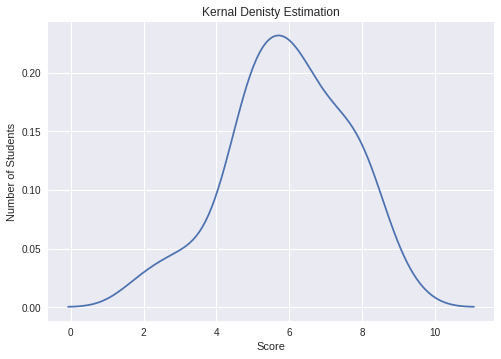

In [13]:
histogram_and_kde_attention_plt(kde=True, hist=False, title="Kernal Denisty Estimation")

### Scatter Plots


```
jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr at 0x7f189222dd90>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)

```

Where:
* kind is the type of plot, you can chose between: 
        { "scatter" | "reg" | "resid" | "kde" | "hex" }
*  dropna : True or False:
        If True, remove observations that are missing from ``x`` and ``y``.
 
 
 
 more info at:
 

```
help(sb.jointplot)
```

[Joint probability distribution from wyzant](https://www.wyzant.com/resources/lessons/math/statistics_and_probability/probability_distributions/joint_probability_distributions)

[Extensive description of types from Wikipedia.org](https://en.wikipedia.org/wiki/Joint_probability_distribution)


In [0]:
# making some psuedo data
x_scatter = np.random.uniform(1,100, 40)
y_scatter = np.random.uniform(1,50, 40)

In [0]:
# turning our psuedo data into a dataframe
x_y_scatter_dictonary = {"X": x_scatter, "Y": y_scatter}

x_y_scatter_df = pd.DataFrame(x_y_scatter_dictonary)

In [16]:
# looking at our data
x_y_scatter_df.head()

,X,Y
0,47.218796,25.745047
1,16.388600,2.067952
2,20.080743,12.332093
3,18.036108,48.013248
4,68.746391,24.461798


*We'll be using a function and just replacing the kind and title in the function for visual ease, but note where it's changing in the function*


In [0]:

def types_of_joint_plots(kind, title=""):
  sb.set()
  sb.jointplot(x="X", y="Y", data= x_y_scatter_df, kind=kind)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(title)
  plt.show()
  

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


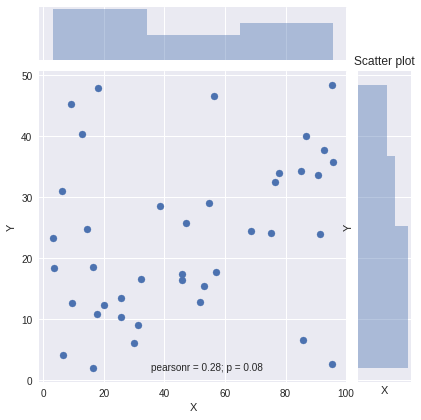

In [18]:
# straightforward scatter plot
types_of_joint_plots(kind="scatter", title="Scatter plot")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


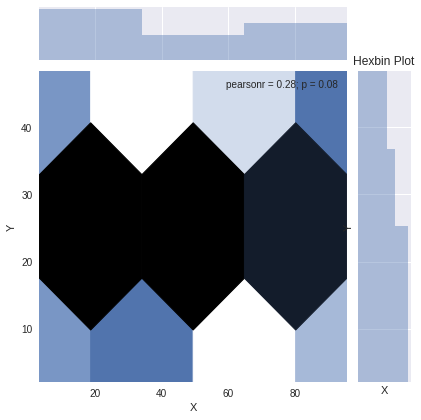

In [19]:
types_of_joint_plots(kind="hex", title="Hexbin Plot")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


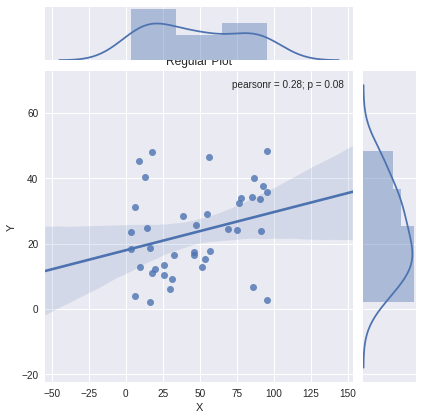

In [20]:
types_of_joint_plots(kind="reg", title="Regular Plot")

[What is a residual plot](https://www.statisticshowto.datasciencecentral.com/residual-plot/)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


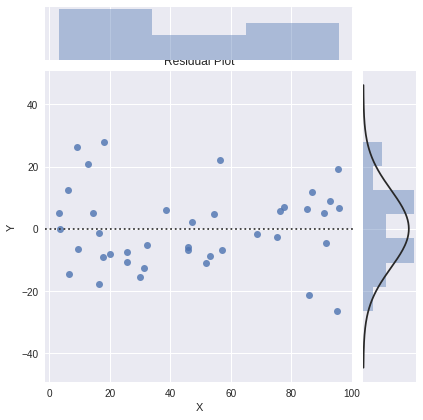

In [21]:
types_of_joint_plots(kind="resid", title="Residual Plot")

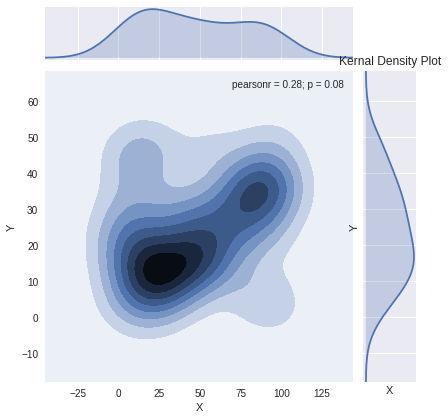

In [22]:
types_of_joint_plots(kind="kde", title="Kernal Density Plot")

### Pariplots
Pair plots are best used for showing the interactions, overlaps and realtionship between variables. We'll take the attention dataset as an example.



  From the docs: 
  > "By default, this function will create a grid of Axes such that each
      variable in ``data`` will by shared in the y-axis across a single row and
      in the x-axis across a single column. The diagonal Axes are treated
      differently, drawing a plot to show the univariate distribution of the data
      for the variable in that column."


Also, pairplot() is a high level use of the function [pairgrid()](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid), if you need more flexibility, use pairgrid()





[SB docs on pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)



Syntax:
```
pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)

```


Lots to unpack here:

Legend:
*Parameter -  data type (if specified), description if simple English*

* data - data frame being plotted
* hue - "string", it's a variable in the data to map plot different plots to different colors, you can think of it like a legend
* hue_order - \[ list of "strings"], the order for the hue variables so you can customize the color order
* palette - color palette, [SB docs on color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* vars - \[list of variable names in the dataframe], optional, default is include everything, but if used anything not included will not be included in the output plot
* {x, y}_vars - \[list of variable names in the dataframe]
* kind - either 'scatter' or 'reg', optional but the default is scatter
* diag_kin - either 'auto', 'hist', or 'kde', plots types for the diagonal subplots, default is depended on "hue"


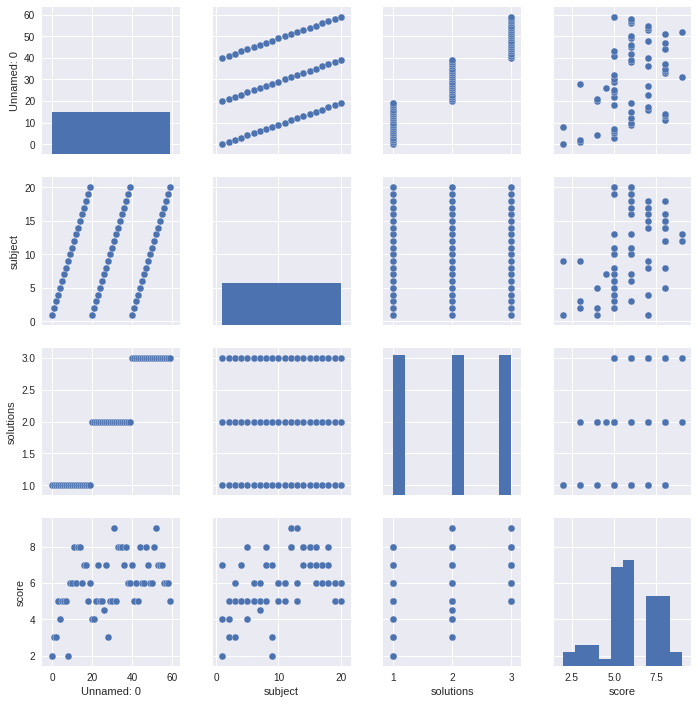

In [23]:
# the most basic pairplot, gives an exorbitant amount of information
sb.set()
sb.pairplot(attention_df)
plt.show()

Showing the use of vars. In this example we'll just be having the graphs where the variables are explicitly defined and only those are shown. We'll get rid of "Unnamed" here

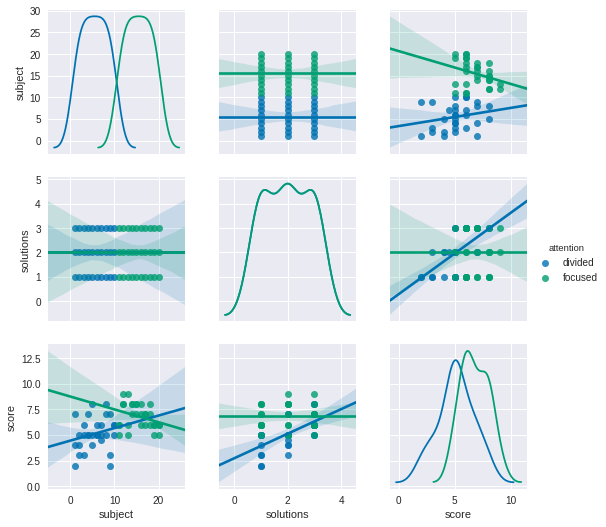

In [24]:
sb.set_style("darkgrid")
sb.pairplot(attention_df, 
            hue='attention',
            diag_kind="kde",
            kind="reg",
            vars=["subject", "solutions", "score"],
            palette="colorblind")
plt.show()

Showing the use of {x, y}_vars. In this example we'll just be having the graphs where "score" intersects with "solutions" and "subejcts". This makes it possible to make a non-square pairplot graph, like shown

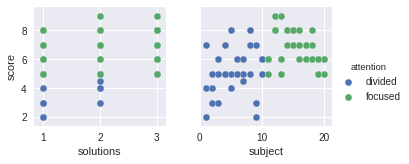

In [25]:

sb.pairplot(attention_df, 
            hue='attention',
            y_vars=["score"],
            x_vars=["solutions","subject"])
plt.show()

### Violin Plots
Renders a combination of boxplot and KDE


From the docs:
   
  > A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    

Syntax: 


```

violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    
```



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


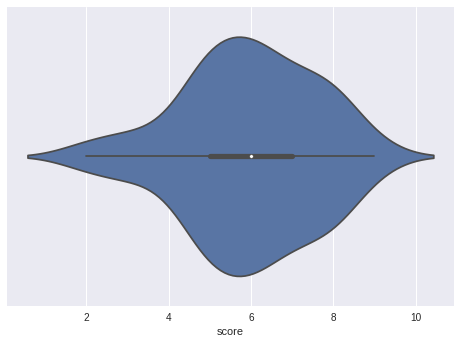

In [26]:
# Basic viloin plot based around score
sb.violinplot(x="score", data=attention_df)
plt.show()

## Categorical Scatter Plots



From the docs:

>Draw a scatterplot where one variable is categorical.

> A strip plot can be drawn on its own, but it is also a good complement
to a box or violin plot in cases where you want to show all observations
along with some representation of the underlying distribution.


Syntax: 


```
stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False, split=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

    ```



In [0]:
mpg_df = sb.load_dataset('mpg')

In [28]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


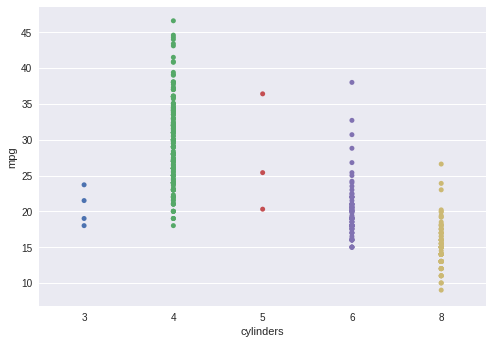

In [29]:
# Basic stripplot, see how it focuses on the categorical data, 
# giving importance to the numerical data
sb.set()
sb.stripplot(x="cylinders", y="mpg", data= mpg_df)
plt.show()

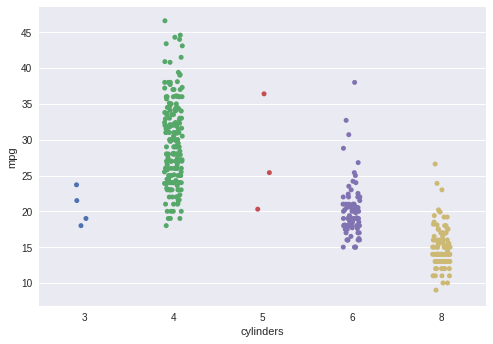

In [30]:
# Jitter adds noise to the plotted data so you can see the indiviudla points better
# since there is overlap in our data 
# (mutliple people we focused and scored 6 for example)
sb.set()
sb.stripplot(x="cylinders", y="mpg", data= mpg_df, jitter = True)
plt.show()

## Swarmplot, similar to stripplot()

From the docs:
> This function is similar to :func:`stripplot`, but the points are adjusted
(only along the categorical axis) so that they don't overlap. This gives a
better representation of the distribution of values, although it does not
scale as well to large numbers of observations (both in terms of the
ability to show all the points and in terms of the computation needed
to arrange them).

Syntax:



```
swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, split=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

```


[Docs](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)



In [0]:
mpg_df = sb.load_dataset('mpg')

In [32]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


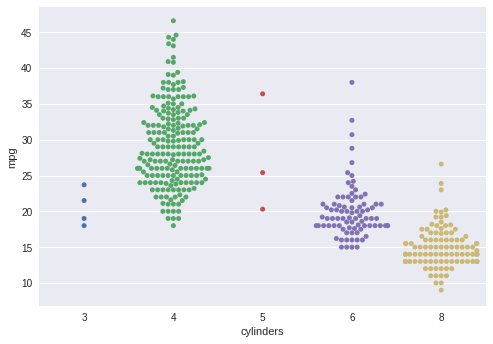

In [33]:
# Basic swarm plot with no defined x, y starting points or focus
sb.set()
sb.swarmplot(x="cylinders", y="mpg", data=mpg_df)
plt.show()

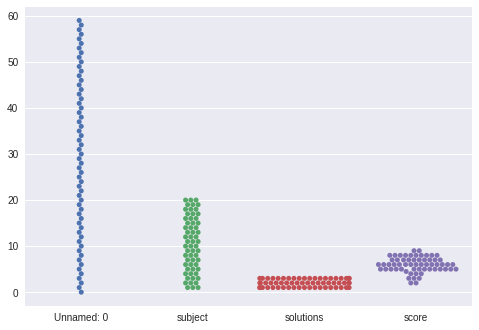

In [36]:
# Basic swarm plot with no defined x, y starting points or focus
sb.set()
sb.swarmplot(data=attention_df)
plt.show()

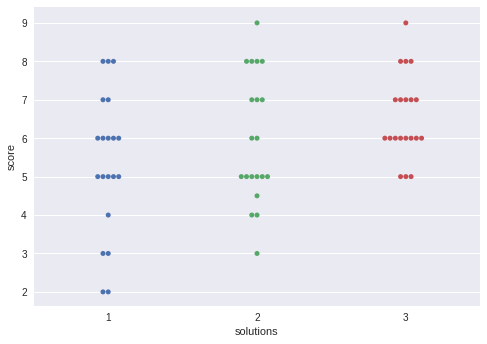

In [37]:
# Basic swarm plot with defined x, y
sb.set()
sb.swarmplot(x="solutions", y="score", data=attention_df)
plt.show()

## Loading data

### Seaborn sample datasets in library
Functions like a Pandas dataframe

In [38]:
# Seaborn actually has quite a few datasets built in
sb.get_dataset_names()

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:373: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 373 of the file /usr/local/lib/python3.6/dist-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [0]:
# loading a sample dataset from the seaborn library
exercise_df = sb.load_dataset('exercise')


In [40]:
exercise_df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [41]:
exercise_df.tail()

,Unnamed: 0,id,diet,pulse,time,kind
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running
89,89,30,no fat,150,30 min,running


### Using pandas to load data

In [0]:
# sample data on Google Colab
california_housing_test = pd.read_csv("sample_data/california_housing_test.csv")


In [43]:
california_housing_test.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


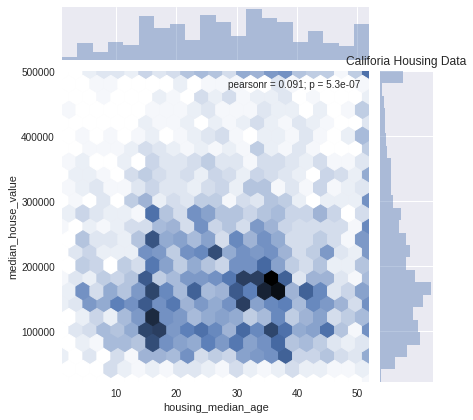

In [44]:
sb.jointplot(x="housing_median_age", 
             y="median_house_value", 
             data=california_housing_test, 
             kind="hex")
plt.title("Califoria Housing Data")
plt.show()

# Customizing

### "Despining"
Removes the rop and right axis spines (does not work with dark or darkgrid themes)

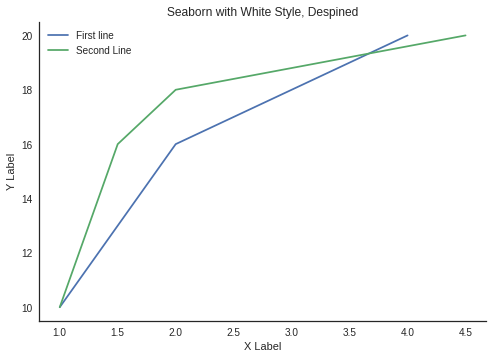

In [45]:
# add seaborn.despine() after the graph has been set

sb.set_style("white")
basic_line_graph("Seaborn with White Style, Despined")
sb.despine()
plt.show()

### Context


*   Notebook - used for displaying on smaller displays (like Jupyter notebooks)
*   Paper - used for displaying in a paper, so smallest
*   Poster - used for displaying huge graph (poster board size)
*   Talk - used for giving presentations (or "talks")

Syntax note: context comes after style


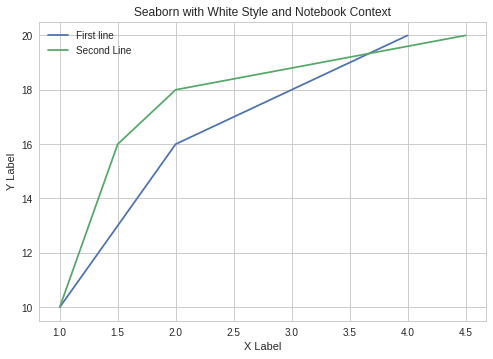

In [46]:
sb.set_style("whitegrid")
sb.set_context("notebook")
basic_line_graph("Seaborn with White Style and Notebook Context")
plt.show()

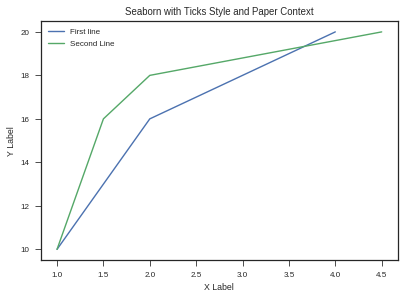

In [47]:
sb.set_style("ticks")
sb.set_context("paper")
basic_line_graph("Seaborn with Ticks Style and Paper Context")
plt.show()

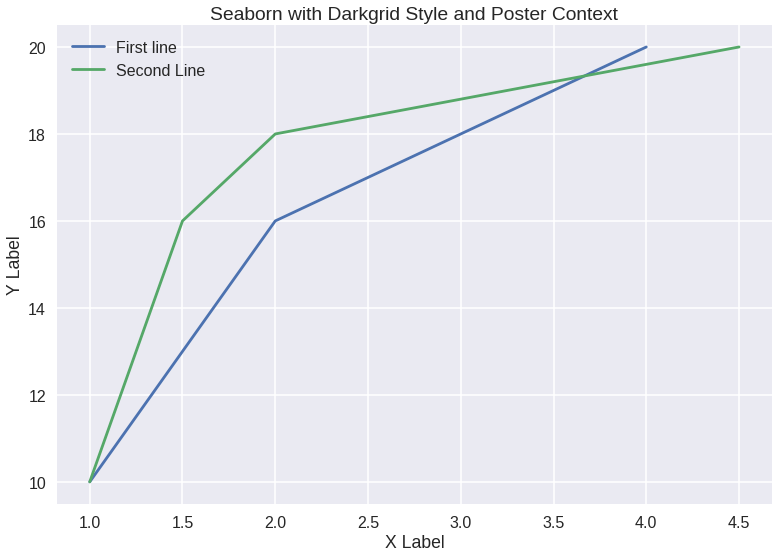

In [48]:
sb.set_style("darkgrid")
sb.set_context("poster")
basic_line_graph("Seaborn with Darkgrid Style and Poster Context")
plt.show()

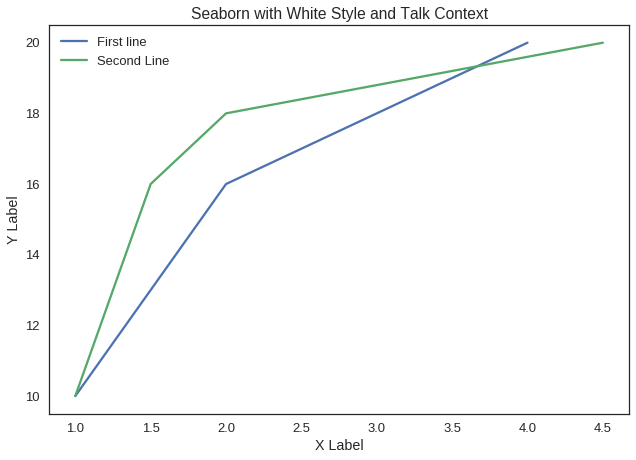

In [49]:
# Context changes the scale of the plot

sb.set_style("white")
sb.set_context("talk")
basic_line_graph("Seaborn with White Style and Talk Context")
plt.show()

## Customizing elements
You can alter the individual parameters in each style
Syntax:


```
seaborn.axes_style("style theme")
```

This returns a dictionary and you can alter it as you so desire

In [50]:
# you can alter the individual parameters in each style

sb.axes_style("ticks")

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 6,
 'xtick.minor.size': 3,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 6,
 'ytick.minor.size': 3}

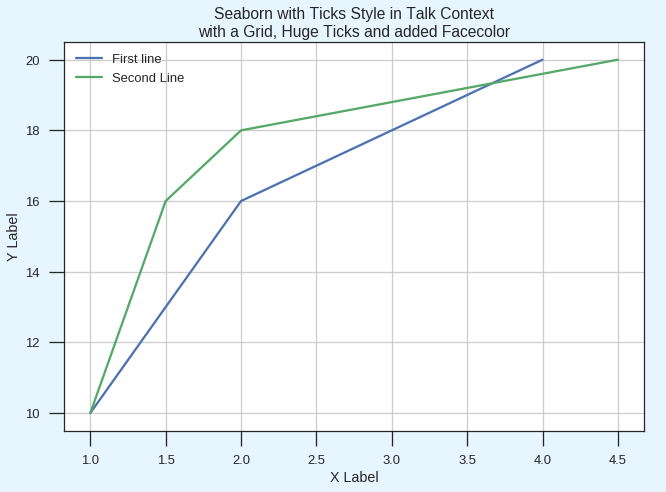

In [51]:
sb.set_style("ticks", 
             {'axes.axisbelow': True, 
              'figure.facecolor': "#e6f5ff",
              'axes.grid': True,
              'ytick.major.size': 15,
              'ytick.minor.size': 15,
              'xtick.major.size': 15,
              'xtick.minor.size': 15})

sb.set_context("talk")
basic_line_graph("Seaborn with Ticks Style in Talk Context\nwith a Grid, Huge Ticks and added Facecolor")
plt.show()

In [52]:
# Notice how after the parameter dictionary has been changed 
# it will continue that as long as this is loaded
sb.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': '#e6f5ff',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 15.0,
 'xtick.minor.size': 15.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 15.0,
 'ytick.minor.size': 15.0}

### For Reference about dictionary parameters:
These are all of the key values in the dictionary parameters you can change:
* axes.facecolor
* axes.edgecolor
* axes.grid
* axes.axisbelow
* axes.linewidth
* axes.labelcolor
* figure.facecolor
* grid.color
* grid.linestyle
* text.color
* xtick.color
* ytick.color
* xtick.direction
* ytick.direction
* xtick.major.size
* ytick.major.size
* xtick.minor.size
* ytick.minor.size
* legend.frameon
* legend.numpoints
* legend.scatterpoints
* lines.solid_capstyle
* image.cmap
* font.family
* font.sans-serif

### Changing the color palette

Syntax for changing color palette


```
seaborn.color_palette(palette = None, n_colors = None, desat = None)

```
Where palette is an option for the palette name, color name(s), and color values. If none is left, then the default (or previously set palette) will be used

n_colors is the number of colors to return, default is 6

desat is the desaturation of each color by proportion

[color_palette docs](https://seaborn.pydata.org/generated/seaborn.color_palette.html?highlight=color_palette#seaborn.color_palette)

[More color palette and plotting docst](https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palplot)



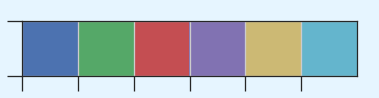

In [53]:
current_palette = sb.color_palette()
sb.palplot(current_palette)
plt.show()

#### Prebuilt color palettes
* "deep"
* "muted"
* "pastel"
* "bright"
* "dark"
* "colorblind"

(these two can be passed through color_palette() or as their own function, shown below)
* "hls"
* "husl" or "HSLuv"

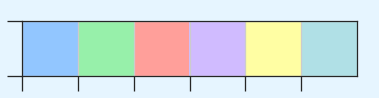

In [54]:
pastel_palette = sb.color_palette("pastel")
sb.palplot(pastel_palette)
plt.show()

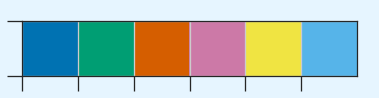

In [55]:
colorblind_palette = sb.color_palette("colorblind")
sb.palplot(colorblind_palette)
plt.show()

#### Using circular color systems

You can use the 


hls_palette() is a "simple transformation of RGB values" 

```
hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65)

```
 and 
 


husl_palette() "makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform"
```
seaborn.husl_palette(n_colors=6, h=0.01, s=0.9, l=0.65)
```

Which 


```
    n_colors : int
        number of colors in the palette
    h : float
        first hue
    l : float
        lightness
    s : float
        saturation
```
are the same parameters for both




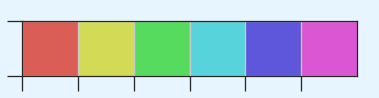

In [56]:
sb.palplot(sb.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65))

In [57]:
help(sb.husl_palette)

Help on function husl_palette in module seaborn.palettes:

husl_palette(n_colors=6, h=0.01, s=0.9, l=0.65)
    Get a set of evenly spaced colors in HUSL hue space.
    
    h, s, and l should be between 0 and 1
    
    Parameters
    ----------
    
    n_colors : int
        number of colors in the palette
    h : float
        first hue
    s : float
        saturation
    l : float
        lightness
    
    Returns
    -------
    palette : seaborn color palette
        List-like object of colors as RGB tuples.
    
    See Also
    --------
    hls_palette : Make a palette using evently spaced circular hues in the
                  HSL system.
    
    Examples
    --------
    
    Create a palette of 10 colors with the default parameters:
    
    .. plot::
        :context: close-figs
    
        >>> import seaborn as sns; sns.set()
        >>> sns.palplot(sns.husl_palette(10))
    
    Create a palette of 10 colors that begins at a different hue value:
    
    .. plot::
   

#### xkcd colors

Named 954 color names and hex codes, if you want to see the entire dictionary you can run this code:

```

seaborn.xkcd_rgb

```
Note, a dictionary of 954 key/value pairs will print

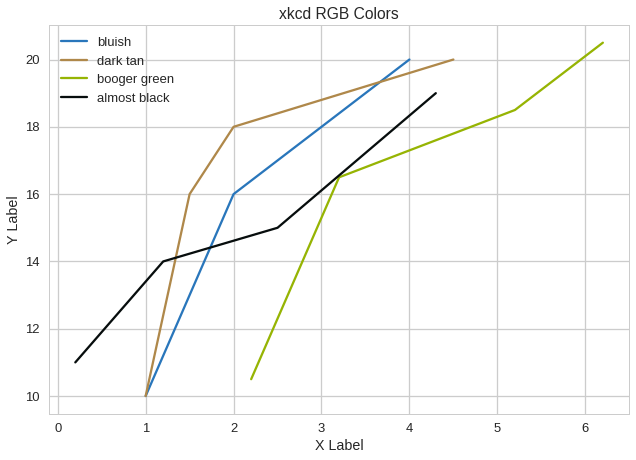

In [58]:
def line_graph_xkcd(title=""):
  
  # Pseudo basic line data
  x1 = [1, 2, 3, 4]
  y1 = [10, 15, 9, 25]

  x2 = [1.0, 1.5, 2.0, 4.5]
  y2 = [10, 16, 18, 20]

  x3 = [2.2, 3.2, 5.2, 6.2]
  y3 = [10.5, 16.5, 18.5, 20.5]
  
  
  x4 = [0.2, 1.2, 2.5, 4.3]
  y4 = [11, 14, 15, 19]
# plotting the lines
  plt.plot(x1, y2, sb.xkcd_rgb["bluish"], label="bluish")
  plt.plot(x2, y2, sb.xkcd_rgb["dark tan"], label="dark tan")
  plt.plot(x3, y3, sb.xkcd_rgb["booger green"], label="booger green")
  plt.plot(x4, y4, sb.xkcd_rgb["almost black"], label="almost black")


  # Descriptors for the graph
  plt.xlabel('X Label')
  plt.ylabel('Y Label')
  plt.title(title)
  # intialize the legend
  plt.legend()

sb.set_style("whitegrid")
sb.despine()
line_graph_xkcd("xkcd RGB Colors")
plt.show()



### Some custom JointGrid()



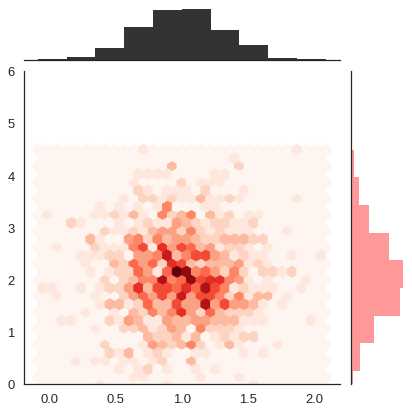

In [59]:
mean = [1, 2]
cov = [[0.1, 0], [0, .7]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

def hexbin(x, y): 
    plt.hexbin(x, y, gridsize=30, cmap='Reds')

with sb.axes_style("white"):
    g = sb.JointGrid(x=x, y=y, ylim=(0,6))
    g = g.plot_joint(hexbin)
    g.ax_marg_x.hist(x, color="k", alpha=.8) 
    g.ax_marg_y.hist(y, color="r", alpha=.4, orientation="horizontal")